# ML Based Prediction of Diabetes - Pima Indian Diabetes Dataset

In this task, we are going to follow a Data Scientist's way of working with data, to produce data products. Machine Learning is just a small part of it. 

## Data Acquisition

The Pima Indian Diabetes Dataset(PIDD) is a publicly available dataset, that can be downloaded free of charge from: https://www.kaggle.com/uciml/pima-indians-diabetes-database/version/1

"This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage." - Kaggle.

First let's connect our notebook to the Google drive..

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os 
dirs= os.listdir("/content/drive/My Drive/GUIST_Webinar_Files/Jupyter_Notebook_Codes/Data")
print(dirs)

['diabetes.csv', 'ds_life_cycle.jpeg', 'data.csv', 'python-ml-breast-cancer-diagnostic-data-set.ipynb', 'mnist.npz', 'h.png', 'intro-to-keras-with-breast-cancer-data-ann.ipynb', 'Complete_ML_Tutorial.ipynb', 'Kmeans.ipynb', 'Handwritten_Digit_Recognizer_Keras_CNN.ipynb', '.DS_Store', '.ipynb_checkpoints']


## Exploratory Data Analysis

Once Data Acquisition, the next task is to do Exploratory Data Analysis (EDA). This step is important because it helps prepare the data for ML based predictive modelling in the next step.

For EDA, multiple Python libraries are available. In this demo, we are going to use Pandas, Matplotlib and Seaborn.

In [ ]:
# Import Libraries and Read the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
diabetes = pd.read_csv('/content/drive/My Drive/GUIST_Webinar_Files/Jupyter_Notebook_Codes/Data/diabetes.csv')
diabetes.columns 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# Let's take a look at the data
diabetes.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
print("Diabetes data set dimensions : {}".format(diabetes.shape))

Diabetes data set dimensions : (768, 9)


In [ ]:
diabetes.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

Visualization of data is an imperative aspect of data science. It helps to understand data and also to explain the data to another person.

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

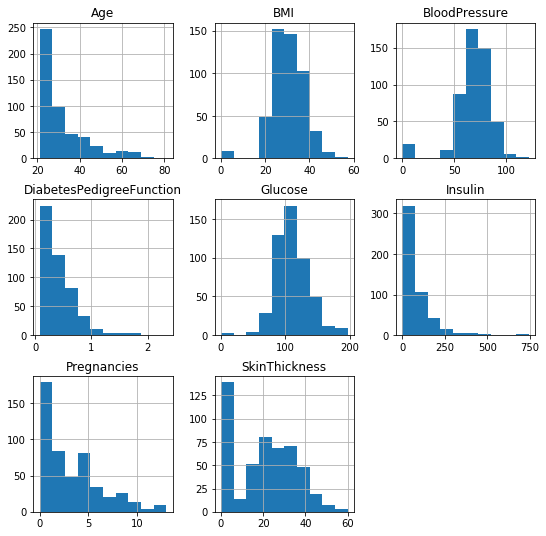

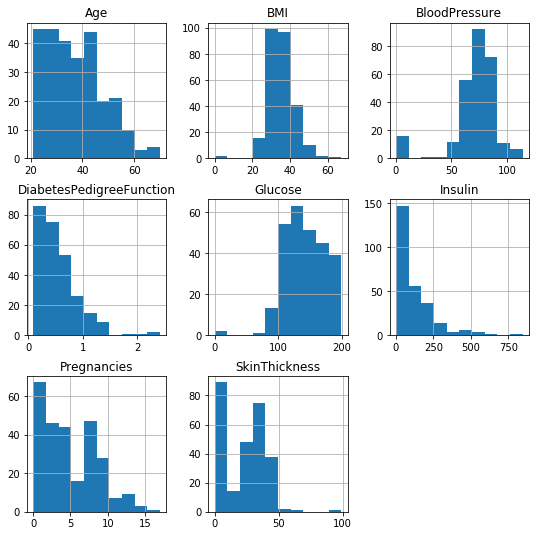

In [ ]:
# Show the distribution of number Patients and Controls, with the help of each of the feautre separately.
diabetes.groupby('Outcome').hist(figsize=(9, 9))

### Data Cleaning: Better data beats fancier algorithms

There are several factors to consider in the data cleaning process.
1. Duplicate or irrelevant observations.
2. Bad labeling of data, same category occurring multiple times.
3. Missing or null data points.
4. Unexpected outliers.

First two of these are not so important for this dataset, since it's a standard dataset.

### Missing or Null Data Points

In [ ]:
# The following Pandas functions can help us find missing or null valued data points

print(diabetes.isnull().sum())
print(diabetes.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


It seems there are no missing values or null values in any of the instances.

### Unexpected Outliers

Blood pressure : By observing the data we can see that there are 0 values for blood pressure. And it is evident that the readings of the data set seems wrong because a living person cannot have diastolic blood pressure of zero.

In [ ]:
print("Total : ", diabetes[diabetes.BloodPressure == 0].shape[0])

Total :  35


Plasma glucose levels : Even after fasting glucose level would not be as low as zero. Therefore zero is an invalid reading.

In [ ]:
print("Total : ", diabetes[diabetes.Glucose == 0].shape[0])

Total :  5


Skin Fold Thickness : For normal people skin fold thickness can’t be less than 10 mm better yet zero. Total count where value is 0 : 227.

In [ ]:
print("Total : ", diabetes[diabetes.SkinThickness == 0].shape[0])

Total :  227


Insulin : In a rare situation a person can have zero insulin but by observing the data, we can find that there is a total of 374 counts.

In [ ]:
print("Total : ", diabetes[diabetes.Insulin == 0].shape[0])

Total :  374


In [ ]:
print("Total : ", diabetes[diabetes.BMI == 0].shape[0])

Total :  11


Here are several ways to handle invalid data values :
1. Ignore/remove these cases : This is not actually possible in most cases because that would mean losing valuable information. And in this case “skin thickness” and “insulin” columns means have a lot of invalid points. But it might work for “BMI”, “glucose ”and “blood pressure” data points.

2. Put average/mean values : This might work for some data sets, but in our case putting a mean value to the blood pressure column would send a wrong signal to the model.

3. Avoid using features : It is possible to not use the features with a lot of invalid values for the model. This may work for “skin thickness” but its hard to predict that.

Since this is a demonstration for machine learning we will proceed with the given data with some minor adjustments.

We will remove the rows in which the “BloodPressure”, “BMI” and “Glucose” are zero.

In [ ]:
diabetes_mod = diabetes[(diabetes.BloodPressure != 0) & (diabetes.BMI != 0) & (diabetes.Glucose != 0)]

print(diabetes_mod.shape)

(724, 9)


In [ ]:
diabetes_mod.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,21.443370,84.494475,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,15.732756,117.016513,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,24.000000,48.000000,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,130.500000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Train Machine Learning Models / Model Selection / Algorithm Selection

Model selection or algorithm selection phase is the most exciting and the heart of machine learning. It is the phase where we select the model which performs best for the data set at hand.

First we will be calculating the “Classification Accuracy (Testing Accuracy)” of a given set of classification models with their default parameters to determine which model performs better with the diabetes data set.

We will import the necessary libraries to the notebook. We import 7 classifiers namely K-Nearest Neighbors, Support Vector Classifier, Logistic Regression, Gaussian Naive Bayes, Random Forest and Gradient Boost to be contenders for the best classifier.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Create the 
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes_mod[feature_names]
y = diabetes_mod.Outcome

In [ ]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

Ex: Generally training the model with Scikit learn is as follows.
1. knn = KNeighborsClassifier()
2. knn.fit(X_train, y_train)

### Evaluation Methods

It is a general practice to avoid training and testing on the same data. The reasons are that, the goal of the model is to predict out-of-sample data, and the model could be overly complex leading to overfitting. To avoid the aforementioned problems, there are two precautions.
1. Train/Test Split
2. K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

### Train / Test Split

This method split the data set into two portions : a training set and a testing set. The training set is used to train the model. And the testing set is used to test the model, and evaluate the accuracy.
1. Pros : But, train/test split is still useful because of its flexibility and speed
2. Cons : Provides a high-variance estimate of out-of-sample accuracy

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = diabetes_mod.Outcome, random_state=0)

In [ ]:
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.729282
1  SVC  0.657459
2   LR  0.767956
3   DT  0.740331
4  GNB  0.734807
5   RF  0.734807
6   GB  0.773481


### K Fold Cross Validation

This method splits the data set into K equal partitions (“folds”), then use 1 fold as the testing set and the union of the other folds as the training set. Then the model is tested for accuracy. The process will follow the above steps K times, using different fold as the testing set each time. The average testing accuracy of the process is the testing accuracy.

Pros : More accurate estimate of out-of-sample accuracy. More “efficient” use of data (every observation is used for both training and testing)

Cons : Much slower than Train/Test split.

In [ ]:
names = []
scores = []
for name, model in models:
    
    kfold = KFold(n_splits=10, random_state=10) 
    score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean()
    
    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name     Score
0  KNN  0.719787
1  SVC  0.656279
2   LR  0.766781
3   DT  0.698935
4  GNB  0.757021
5   RF  0.744749
6   GB  0.777816


### Reporting Results

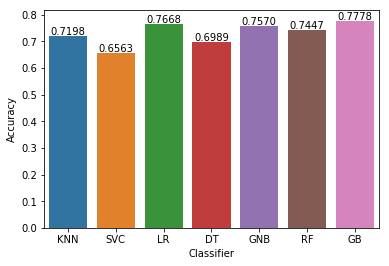

In [ ]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

From the observations above, it can be concluded that at a baseline level Gradient Boosting Algorithm does better than the other classifiers under considerations. 

However, further improvements can be achieved, by performing some advanced level preprocessing and hyperparameter tuning.

Hints:
1. Perform Feature Selection: Select only highly predictive features.
2. Perform Hyperparameter Tuning: Tune the parameters of the baseline classifiers, to get the most out of the models.